In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

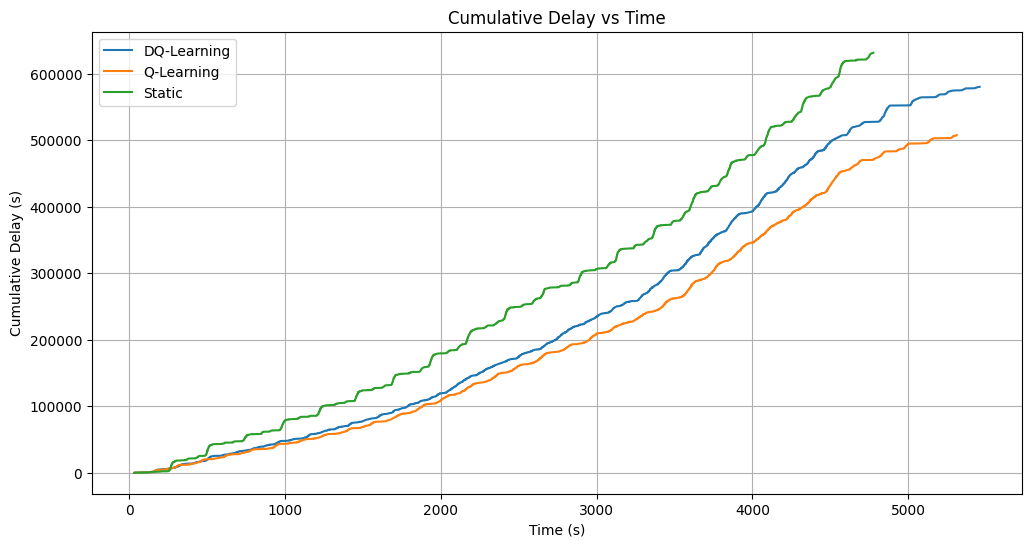

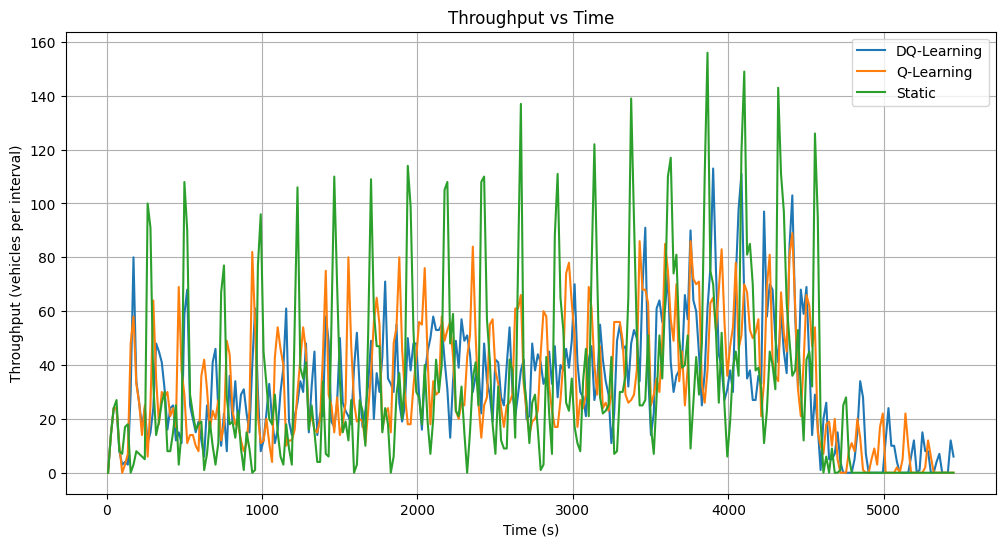

In [ ]:
def load_data(file_path, label):
    df = pd.read_csv(file_path)
    df['method'] = label
    return df

# Load all three datasets
df_static = load_data("outputs/static_vehicle_data/processed_tripinfo_static_vehicle_data.csv","Static")
df_q = load_data("outputs/dynamic_QL_vehicle_data/processed_tripinfo_dynamic_QL_vehicle_data.csv", "Q-Learning")
df_dq = load_data("outputs/dynamic_DQL_vehicle_data/processed_tripinfo_dynamic_DQL_vehicle_data.csv", "DQ-Learning")

# Combine all data
df_all = pd.concat([df_static, df_q, df_dq], ignore_index=True)
#df_all = pd.concat([df_static, df_q], ignore_index=True)

# Define time bins (300 intervals)
min_time = 0
max_time = df_all['tripinfo_arrival'].max()
bins = np.linspace(min_time, max_time, 301)

# Cumulative Delay (sum of timeLoss up to each bin)
plt.figure(figsize=(12, 6))
for method, df in df_all.groupby('method'):
    df_sorted = df.sort_values('tripinfo_arrival')
    df_sorted['cumulative_delay'] = df_sorted[' tripinfo_timeLoss'].cumsum()
    plt.plot(df_sorted['tripinfo_arrival'], df_sorted['cumulative_delay'], label=method)

plt.xlabel("Time (s)")
plt.ylabel("Cumulative Delay (s)")
plt.title("Cumulative Delay vs Time")
plt.legend()
plt.grid(True)
plt.savefig('outputs/plots/Cumulative_Delay_vs_Time.png')
plt.show()

# Throughput: number of vehicles arriving in each interval
plt.figure(figsize=(12, 6))
for method, df in df_all.groupby('method'):
    throughput, _ = np.histogram(df['tripinfo_arrival'], bins=bins)
    midpoints = (bins[:-1] + bins[1:]) / 2
    plt.plot(midpoints, throughput, label=method)

plt.xlabel("Time (s)")
plt.ylabel("Throughput (vehicles per interval)")
plt.title("Throughput vs Time")
plt.legend()
plt.grid(True)
plt.savefig('outputs/plots/Throughput_vs_Time.png')
plt.show()


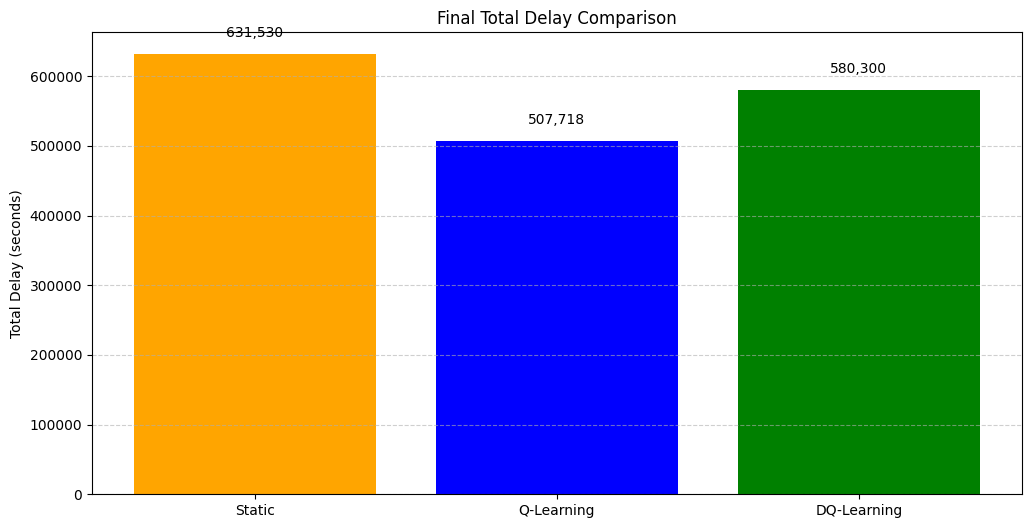

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total delay (sum of tripinfo_timeLoss)
static_total_delay = df_static[' tripinfo_timeLoss'].sum()
ql_total_delay = df_q[' tripinfo_timeLoss'].sum()
dql_total_delay = df_dq[' tripinfo_timeLoss'].sum()

# Prepare data for bar chart
methods = ['Static', 'Q-Learning', 'DQ-Learning']
total_delays = [static_total_delay, ql_total_delay, dql_total_delay]

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(methods, total_delays, color=['orange', 'blue', 'green'])
plt.ylabel("Total Delay (seconds)")
plt.title("Final Total Delay Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with exact values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20000, f"{int(yval):,}", 
             ha='center', va='bottom', fontsize=10)
plt.savefig('outputs/plots/Final_Total_Delay_Comparison.png')
plt.show()


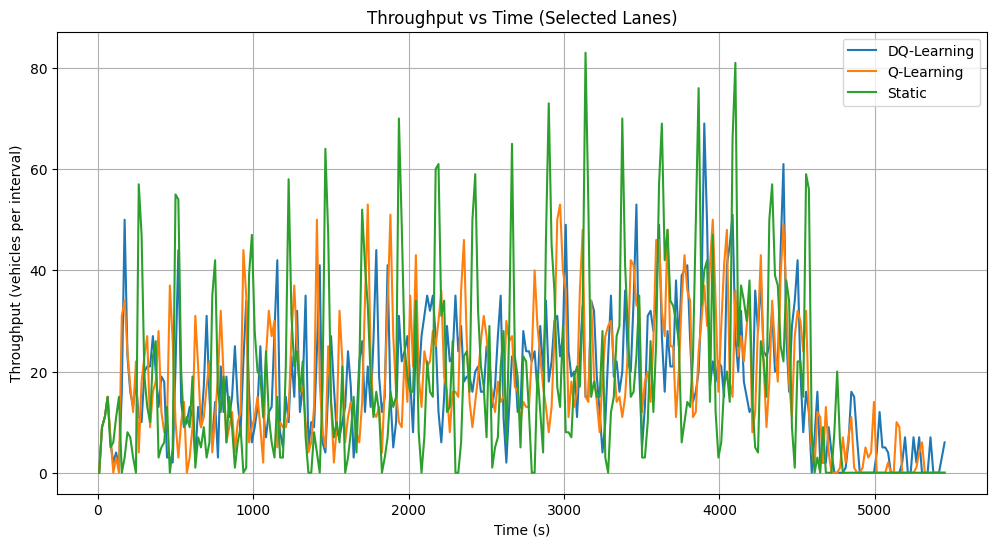

In [10]:
# Lanes you want to include
lanes_of_interest = [
    " KBJ_to_CMB_002_1", " KBJ_to_CMB_002_2", " KBJ_to_CMB_002_3", " KBJ_to_CMB_002_4",
    " KB_to_MRT_001_1", " KB_to_MRT_001_2", " KB_to_MRT_001_3",
    " KBJ_to_P_1", " KBJ_to_P_2"
]
df_all.columns = df_all.columns.str.strip()

# Throughput: number of vehicles arriving in each interval only for selected lanes
plt.figure(figsize=(12, 6))
for method, df in df_all.groupby('method'):
    # Filter for lanes of interest
    df_filtered = df[df['tripinfo_arrivalLane'].isin(lanes_of_interest)]
    #df_filtered = df[df['tripinfo_arrivalLane'].str.contains('|'.join(lanes_of_interest))]

    throughput, _ = np.histogram(df_filtered['tripinfo_arrival'], bins=bins)
    midpoints = (bins[:-1] + bins[1:]) / 2
    plt.plot(midpoints, throughput, label=method)

plt.xlabel("Time (s)")
plt.ylabel("Throughput (vehicles per interval)")
plt.title("Throughput vs Time (Selected Lanes)")
plt.legend()
plt.grid(True)
plt.savefig('outputs/plots/Throughput_vs_Time_Selected_Lanes.png')
plt.show()


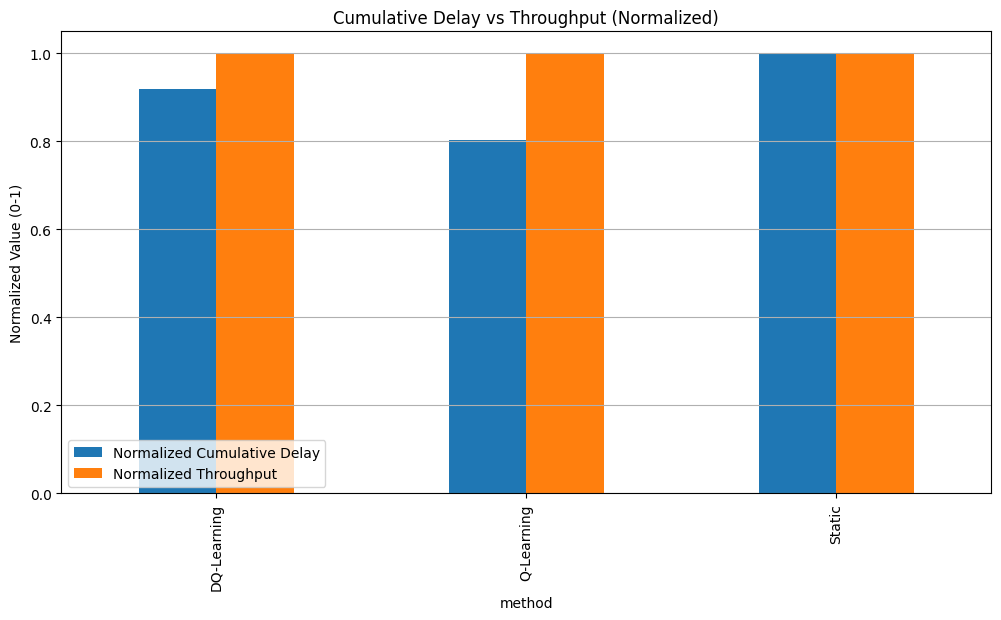

In [11]:
# 1. Compute cumulative delay for each method
cumulative_delay = df_all.groupby('method')['tripinfo_timeLoss'].sum()

# 2. Compute total throughput (vehicles arrived)
throughput = df_all.groupby('method').size()

# Normalize (divide by max for comparison)
cumulative_delay_norm = cumulative_delay / cumulative_delay.max()
throughput_norm = throughput / throughput.max()

# Combine into a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Normalized Cumulative Delay': cumulative_delay_norm,
    'Normalized Throughput': throughput_norm
})

# Plot as grouped bar chart
comparison_df.plot(kind='bar', figsize=(12,6))
plt.ylabel('Normalized Value (0-1)')
plt.title('Cumulative Delay vs Throughput (Normalized)')
plt.grid(axis='y')
plt.legend(loc='lower left')
plt.show()
